In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [54]:
df = pd.read_csv('196genes_635021f405530.csv')

In [55]:
df.head(5)

,gene,1,2,3,4,5,6,7
0,SEC8,0.190,0.186,0.089,0.266,0.306,0.162,0.454
1,YPR147C,0.149,0.152,0.094,0.324,0.311,0.236,0.373
2,ITC1,0.117,0.282,0.128,0.284,0.196,0.154,0.444
3,PAU13,0.144,0.248,0.017,0.151,0.235,0.299,0.459
4,HHF2,0.053,0.105,0.165,0.289,0.254,0.221,0.334


In [56]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
print('X:', X.shape, X.dtype)

X: (196, 7) float32


In [57]:
# make labels int
i_to_name = list(sorted(df['gene'].unique()))
name_to_i = {name: i for i, name in enumerate(i_to_name)}

y = np.array([name_to_i[_y] for _y in df['gene']])
print('y:', y.shape, y.dtype)
print(y[:10])

y: (196,) int64
[146 182  64  84  54  80 169 149 168  65]


In [58]:
from scipy.cluster.hierarchy import dendrogram


def get_linkage(model):
    # needed for visualization
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

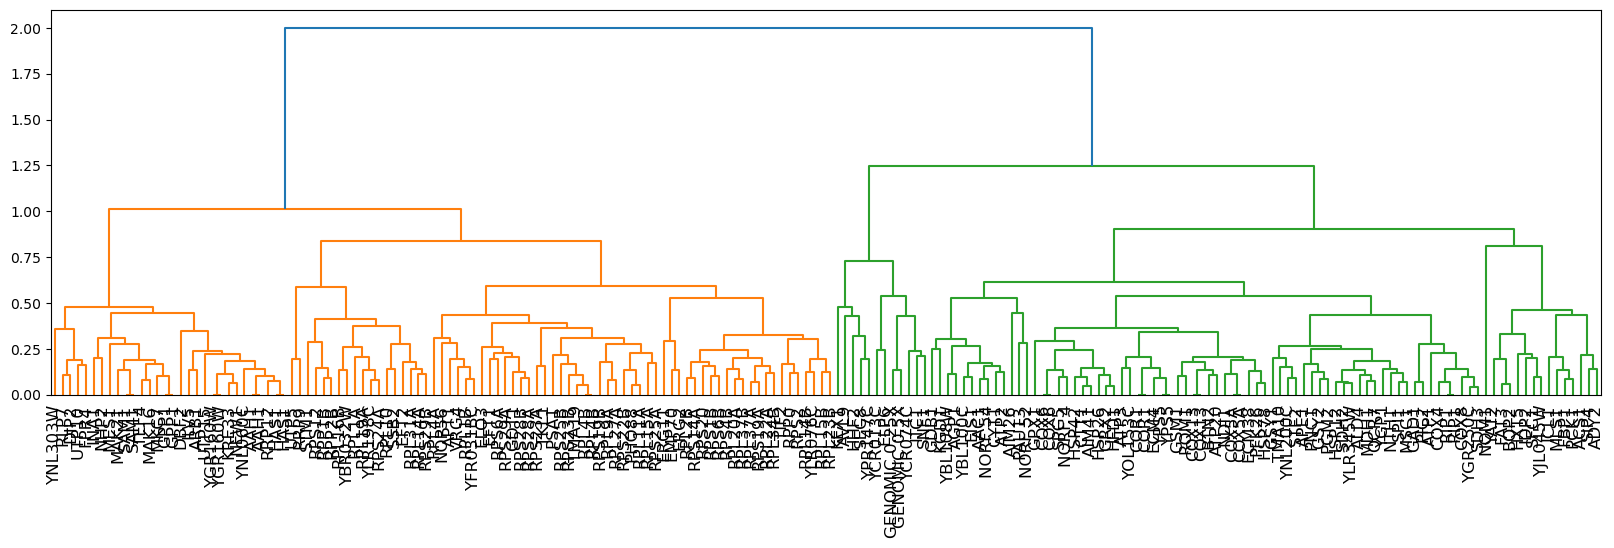

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(linkage='complete',
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(X_norm)

links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           labels=list(df['gene']),
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(linkage='ward',
                                distance_threshold=0,
                                n_clusters=None)
model.fit(X_norm)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

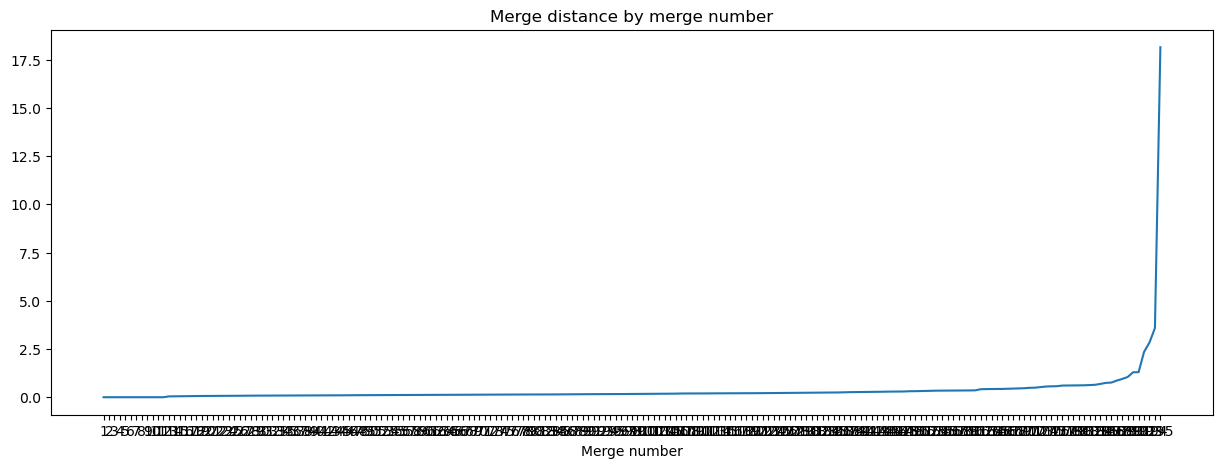

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
xticks = np.arange(1, y.size)
ax.set_title('Merge distance by merge number')
ax.set_xticks(xticks)
ax.set_xlabel('Merge number')
ax.plot(xticks, model.distances_)

In [62]:
from scipy.cluster.hierarchy import fcluster

fl = fcluster(links, 2, criterion='maxclust')

In [63]:
print(fl)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [64]:
genes = df[df.columns[0]].to_numpy()
cluster_indices = {i: np.where(fl == i)[0] for i in range(1, np.max(fl) + 1)}
cluster_indices = {i: [genes[k] for k in v] for i, v in cluster_indices.items()}

In [65]:
for group, genes in cluster_indices.items():
    print(f'{group}: [{", ".join(genes)}]')

1: [RRP12, AAH1, HAS1, SAM1, GPP1, YGR160W, UTP5, HAS1, AAH1, YGR160W, MKC7, GPP1, SAM1, RLP7, DBF2, UTP10, FPR4, DIP2, ILV5, YNL303W, MAK21, UTP15, YNL060C, ERG11, KRE33, ARB1, MES1, INA1, RRP9, TEF4, NEW1, MAK16, NHP2, RPL15A, RPL4B, RPL1A, RPL16B, RPP0, RPS20, RPL9A, RPS19B, RPS22B, RPL27A, RPL4B, RPL15B, RPS23B, PHO88, RPL11A, RPS25A, RPL23B, RPS28B, RPL1B, TMA19, YBR032W, ELO3, RPS29A, YFR031BC, RPS23A, RPS25B, EFT1, RPS12, TKL1, RPL14A, RPS1B, GDT1, RPS6A, NOP56, RPL37A, RPP1B, RPS28A, RPL4A, RPS6B, VRG4, YLR198C, RPL14B, RPL20A, RPS19A, RPL2B, RPS24A, RPL31A, PSA1, RPS29B, RPL10, RPS2, EMP70, RPP2B, APT1, YLR076C, RPL37B, RPL19A, SSB2, RPL22A, ERG2, STM1, RPS4B, TIF2, RPS14A, RPL34B, EFT2]
2: [SEC8, YPR147C, ITC1, PAU13, HHF2, NORF 52, YCR074C, SNF1, YCR013C, KEX1, GENOMIC 0.25X, ELP6, AVL9, AIM26, GENOMIC 0.5X, MLS1, IDP2, ICL1, ACS1, FBP1, SFC1, PCK1, HXT5, YJL045W, FAT3, SIP4, YAT2, ADY2, YPS5, BOP2, GSY2, CTT1, HSP42, HSP26, HSP12, GPX1, NQM1, PGM2, YGP1, YNL200C, GSY1, GAD1